## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential

## Carregamento dos dados

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Tratamento dos dados

In [3]:
# Normalização dos pixels para o intervalo [0, 1]
max_val = X_train.max()
print(max_val)
X_train = X_train / max_val
X_test = X_test / max_val

# Transforma as imagens em vetores unidimensionais de 784 px (28 x 28)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

255


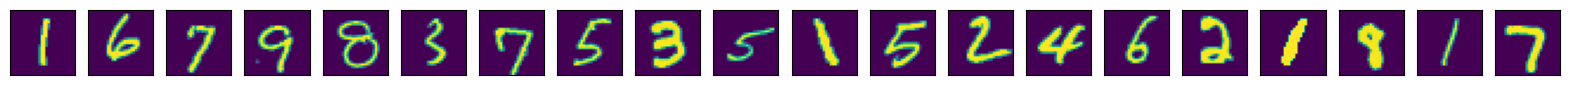

In [4]:
# Visualiza algumas amostras
n = 20
indexes = np.random.choice(len(X_train), n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# Aplica ruído nos dados e armazena em variáveis acessórias
factor = .1
X_train_noisy = X_train + factor * np.random.normal(loc=0.0, scale=1.,
                                                    size=X_train.shape)
X_test_noisy = X_test + factor * np.random.normal(loc=0.0, scale=1.,
                                                  size=X_test.shape)

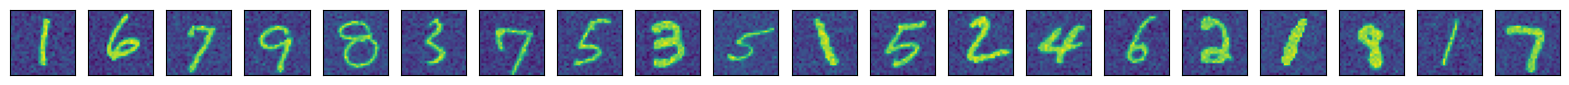

In [6]:
# Visualiza as amostras com ruído
n = 20
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train_noisy[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Construção do modelo autoencoder

In [7]:
# Define a dimensão da representação codificada
n_latent = 60
dim_input = X_train.shape[1]

# Cria o modelo do autoencoder
model = Sequential()
model.add(Dense(units=400, input_dim=dim_input, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=n_latent, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=dim_input, activation='sigmoid'))

# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

e:\workspace\ciencia-dados\autoencoders\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Treinamento com dados originais e validação com dados sem ruídos

In [8]:
# Treina o autoencoder
model.fit(X_train, X_train, epochs=30, batch_size=256, shuffle=True,
          validation_data=(X_test, X_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2843 - val_loss: 0.1258
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1200 - val_loss: 0.1037
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1022 - val_loss: 0.0949
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0946 - val_loss: 0.0900
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0900 - val_loss: 0.0867
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0869 - val_loss: 0.0844
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0847 - val_loss: 0.0833
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0831 - val_loss: 0.0815
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0813 - val_loss: 0.0802
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0803 - val_loss: 0.0793
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0795 - val_loss: 0.0781
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

In [9]:
# Codifica e decodifica as imagens de teste sem ruido
encoded_imgs = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## Comparação dos dados originais e dos dados gerados - Sem ruído

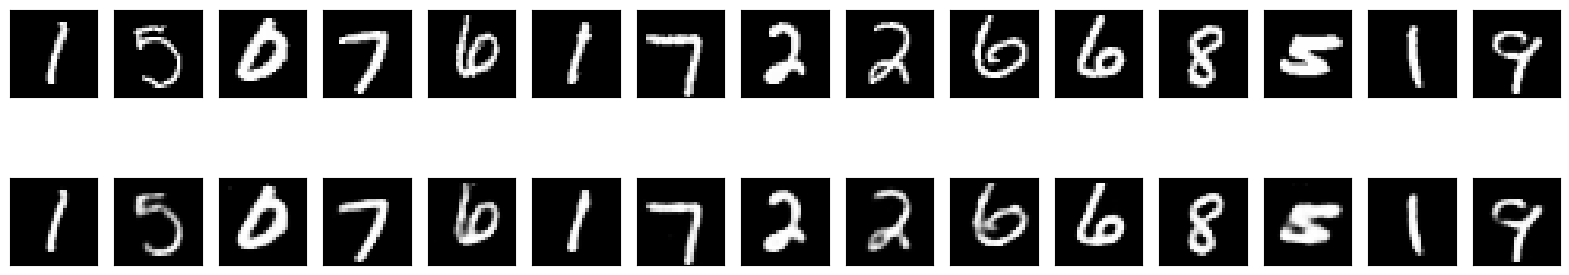

In [10]:
n = 15
indexes = np.random.choice(X_test.shape[0], n)
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Validação com dados com ruído usando o modelo treinado

In [11]:
# Codifica e decodifica as imagens de teste com ruído
endoded_imgs = model.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


## Comparação dos dados originais e dos dados gerados - Sem ruído

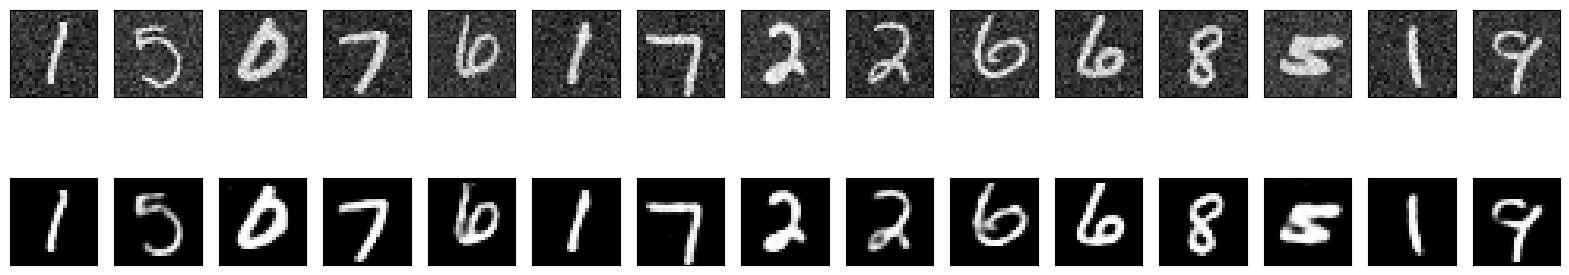

In [12]:
plt.figure(figsize=(20, 4))
for i, index in enumerate(indexes):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Criação de modelo classificador para testar as amostrar ruidosas, amostras originais e amostras recuperadas com ruído

In [13]:
# dropout = .45
input_dim = X_train.shape[1]
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=input_dim, activation='relu'))
# model2.add(Dropout(dropout))  # Essa camada evita overfitting
model2.add(Dense(units=100, activation='relu'))
# model12.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [14]:
model2.fit(X_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.5802
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1258
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0756
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0532
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0312
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0226
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0164
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0122
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0065
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0110
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [15]:
loss, acc = model2.evaluate(X_test, y_test)
print(f'\nTeste de Acurácia - Classificação sem ruído: {acc * 100:.1f}')
loss, acc = model2.evaluate(X_test_noisy, y_test)
print(f'\nTeste de Acurácia - Classificação com ruído: {acc * 100:.1f}')
loss, acc = model2.evaluate(endoded_imgs, y_test)
print(f'\nTeste de Acurácia - Classificação das imagens recuperadas com ruído: {acc * 100:.1f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9751 - loss: 0.1433

Teste de Acurácia - Classificação sem ruído: 97.9
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9699 - loss: 0.1808

Teste de Acurácia - Classificação com ruído: 97.4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.9663 - loss: 0.1807

Teste de Acurácia - Classificação das imagens recuperadas com ruído: 97.3
